In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk

# Economic Factors in Corporate Bond Yields
• Inflation
• Economic Growth (GDP)
• Interest Rates

## Create the data-set

In [2]:
Bond_Market = {'Year': [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
                'Month': [12, 12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12],
                'Federal Funds Rate': [5.29,5.50,4.68,5.30,6.40,1.82,1.24,0.98,2.16,4.16,5.24,4.24,0.16,0.12,0.18,0.07,0.16,0.09,0.12,0.24,0.54,1.30,2.27],
                'Corporate Bond Yield': [7.37,7.27,6.53,7.05,7.62,7.08,6.49,5.66,5.63,5.23,5.59,5.56,5.63,5.31,4.94,4.64,3.67,4.23,4.16,3.89,4.07,3.47,4.02],        
                'Inflation Rate': [3.3,1.7,1.6,2.7,3.4,1.6,2.4,1.9,3.3,3.4,2.5,4.1,0.1,2.7,1.5,3.0,1.7,1.5,0.8,0.7,2.1,2.1,1.9]
               }

df = DataFrame(Bond_Market,columns=['Year','Month','Federal Funds Rate','Corporate Bond Yield','Inflation Rate']) 

print (df)

    Year  Month  Federal Funds Rate  Corporate Bond Yield  Inflation Rate
0   1996     12                5.29                  7.37             3.3
1   1997     12                5.50                  7.27             1.7
2   1998     12                4.68                  6.53             1.6
3   1999     12                5.30                  7.05             2.7
4   2000     12                6.40                  7.62             3.4
5   2001     12                1.82                  7.08             1.6
6   2002     12                1.24                  6.49             2.4
7   2003     12                0.98                  5.66             1.9
8   2004     12                2.16                  5.63             3.3
9   2005     12                4.16                  5.23             3.4
10  2006     12                5.24                  5.59             2.5
11  2007     12                4.24                  5.56             4.1
12  2008     12                0.16   

Stock_Market = {'Year': [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
                'Month': [12, 12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12],
                'Federal Funds Rate': [5.29,5.50,4.68,5.30,6.40,1.82,1.24,0.98,2.16,4.16,5.24,4.24,0.16,0.12,0.18,0.07,0.16,0.09,0.12,0.24,0.54,1.30,2.27],
                'Bond Yield': [7.37,7.27,6.53,7.05,7.62,7.08,6.49,5.66,5.63,5.23,5.59,5.56,5.63,5.31,4.94,4.64,3.67,4.23,4.16,3.89,4.07,3.47,4.02]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Federal Funds Rate','Bond Yield']) 

print (df)

## Check for Linearity

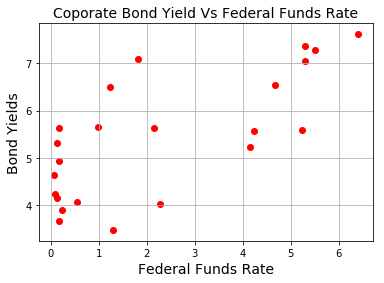

In [3]:
plt.scatter(df['Federal Funds Rate'], df['Corporate Bond Yield'], color='red')
plt.title('Coporate Bond Yield Vs Federal Funds Rate', fontsize=14)
plt.xlabel('Federal Funds Rate', fontsize=14)
plt.ylabel('Bond Yields', fontsize=14)
plt.grid(True)
plt.show()

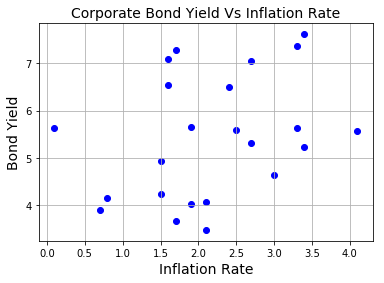

In [4]:
plt.scatter(df['Inflation Rate'], df['Corporate Bond Yield'], color='blue')
plt.title('Corporate Bond Yield Vs Inflation Rate', fontsize=14)
plt.xlabel('Inflation Rate', fontsize=14)
plt.ylabel('Bond Yield', fontsize=14)
plt.grid(True)
plt.show()

In [5]:
#two variables for the multiple regression
X = df[['Inflation Rate','Federal Funds Rate']]
Y = df['Corporate Bond Yield']
#with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Federal_Funds_Rate = 2.25
New_Inflation_Rate = 1.6
print ('Predicted Bond Yield: \n', regr.predict([[New_Federal_Funds_Rate ,New_Inflation_Rate]]), '%')

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 4.662023580892216
Coefficients: 
 [-0.0955546   0.43362395]
Predicted Bond Yield: 
 [5.14082405] %
                             OLS Regression Results                             
Dep. Variable:     Corporate Bond Yield   R-squared:                       0.512
Model:                              OLS   Adj. R-squared:                  0.463
Method:                   Least Squares   F-statistic:                     10.50
Date:                  Mon, 04 Mar 2019   Prob (F-statistic):           0.000762
Time:                          23:55:26   Log-Likelihood:                -29.821
No. Observations:                    23   AIC:                             65.64
Df Residuals:                        20   BIC:                             69.05
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025    

In [6]:
# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Federal_Funds_Rate label and input box
label1 = tk.Label(root, text='Type Federal Funds Rate: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Inflation_Rate label and input box
label2 = tk.Label(root, text=' Type Inflation Rate: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Federal_Funds_Rate #our 1st input variable
    New_Federal_Funds_Rate = float(entry1.get()) 
    
    global New_Inflation_Rate #our 2nd input variable
    New_Inflation_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Bond Yield: ', regr.predict([[New_Federal_Funds_Rate ,New_Inflation_Rate]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Bond Yield',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
root.mainloop()

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(df['Federal Funds Rate'].astype(float),df['Corporate Bond Yield'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend() 
ax3.set_xlabel('Federal Funds Rate')
ax3.set_title('Federal Funds Rate Vs. Corporate Bond Yield')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Inflation Rate'].astype(float),df['Corporate Bond Yield'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend() 
ax4.set_xlabel('Inflation Rate')
ax4.set_title('Inflation Rate Vs. Corporate Bond Yield')

root.mainloop()

NameError: name 'FigureCanvasTkAgg' is not defined